### Binary Classification of data into income over 50K and income under 50K  
**Description** : Predict whether income exceeds $50K/yr based on census data

Data source:  https://archive.ics.uci.edu/ml/datasets/Adult  

**Metadata**

|Field |Description|  
-------|------------
|age| continuous.|
|workclass| Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.|
|fnlwgt| continuous.|
|education| Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.|
|education-num| continuous.|
|marital-status| Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.|
|occupation| Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.|
|relationship| Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.|
|race| White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.|
|sex| Female, Male.|
|capital-gain| continuous.|
|capital-loss| continuous.|
|hours-per-week| continuous.|
|native-country| United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.|
|income|>50K, <=50K.


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Import data from file downloaded from the Data source url

In [23]:
columns=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
data=pd.read_csv("E:\python_projects\Springboard\datasets\\adult.data",names=columns)
len(data)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Remove leading and trailing spaces from data

In [24]:
for col in columns:
    if data[col].dtype=='object':
        data[col]=data[col].str.strip()

In [25]:
#change income column to be 1 or 0 based on if the income is greater than 50K or not
data['income']=data['income'].map(lambda x: 0 if x == '<=50K' else 1)


In [26]:
#Verify the counts for the income field
data['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [27]:
#Separating the input values(X) and outcomes(Y)
X=data.drop('income',axis=1)
Y=data['income']

In [8]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

## Check for missing values

In [28]:
X.isnull().sum().sort_values(ascending=False)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

## Converting categorical values into numerical 

In [9]:
X['native-country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

## Inspect the data types of the dataframe for any datatype that is not integer or float.Check the distinct values and counts

## Change the 42 distinct values on the native-country to 2 values, since the non-United states values have low cardinality

In [10]:
X['native-country']=X['native-country'].map(lambda x: 'United-States' if x=='United-States' else 'Other')
X['native-country'].value_counts()

United-States    29170
Other             3391
Name: native-country, dtype: int64

## Count the total number of categorical values 

In [11]:
cat_col_count=0
for col in X.columns:
    if X[col].dtype not in ['int64','float64']:
        unique_values=X[col].value_counts()
        print(f'Number of unique values in {col}: {len(pd.unique(X[col]))}\n')
        numerical_col_count+=len(pd.unique(X[col]))
print(f"total Categorical rows:{cat_col_count}")

Number of unique values in workclass: 9



NameError: name 'numerical_col_count' is not defined

## Check the numerical and categorical fields

In [12]:
print("numerical fields")
print("___________________")
for col in X.columns:
    if X[col].dtype in ['int64','float64']:
        print(col)
        
print("\ncategorical fields")
print("___________________")
for col in X.columns:
    if X[col].dtype not in ['int64','float64']:
        print(col)

numerical fields
___________________
age
fnlwgt
education-num
capital-gain
capital-loss
hours-per-week

categorical fields
___________________
workclass
education
marital-status
occupation
relationship
race
sex
native-country


In [13]:
X['relationship'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [14]:
X['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [15]:
X['marital-status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

## Add dummy fields ( matrix of 1s and 0s for unique categorical values)

In [16]:
def add_dummies(df):
    for col in df.columns:
        if  df[col].dtype not in ['int64','float64']:
            dummy_cols=pd.get_dummies(df[col],prefix=col,dummy_na=False)
            df=df.drop(col,axis=1)
            df=pd.concat([df,dummy_cols],axis=1)
    return df
            

X=add_dummies(X)
X.head()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native-country_Other,native-country_United-States
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
4,28,338409,13,0,0,40,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0


## Check the generated columns for categorical values

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 68 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   age                                   32561 non-null  int64
 1   fnlwgt                                32561 non-null  int64
 2   education-num                         32561 non-null  int64
 3   capital-gain                          32561 non-null  int64
 4   capital-loss                          32561 non-null  int64
 5   hours-per-week                        32561 non-null  int64
 6   workclass_?                           32561 non-null  uint8
 7   workclass_Federal-gov                 32561 non-null  uint8
 8   workclass_Local-gov                   32561 non-null  uint8
 9   workclass_Never-worked                32561 non-null  uint8
 10  workclass_Private                     32561 non-null  uint8
 11  workclass_Self-emp-inc                325

In [34]:
X['age'].name

'age'

## Feature Distribution by Outcomes

In [54]:
def plot_histogram(x):
    plt.hist(x,color='blue',alpha=0.5)
    plt.title("Histogram of {var}.format(var=x.name)")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

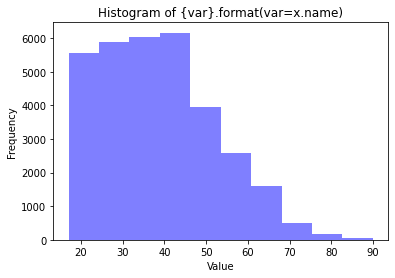

In [55]:
plot_histogram(X["age"])

In [56]:
def plot_histogram_x_y(x,y):
    plt.hist(x[y==0],color='blue',alpha=0.5,label='Outcome=0')
    plt.hist(x[y==1],color='pink',alpha=0.5,label='Outcome=1')
    plt.title("Histogram of {var} by outcome ".format(var=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

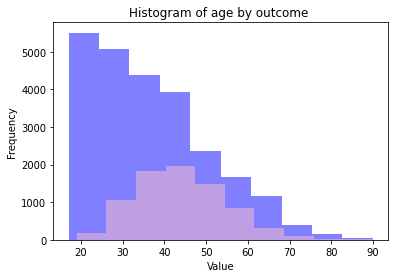

In [57]:
plot_histogram_x_y(X["age"],Y)
